In [204]:
import pandas as pd 
import os


### Merging 12 months of data into single CSV file.

In [205]:
df = pd.read_csv("/Users/eileen/Desktop/Data Science Job/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")


files= [file for file in os.listdir("/Users/eileen/Desktop/Data Science Job/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data= pd.DataFrame()


for file in files: 
    df= pd.read_csv("/Users/eileen/Desktop/Data Science Job/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+ file)
    all_months_data = pd.concat([all_months_data, df])
    

all_months_data.to_csv("all_data.csv",index=False)



#### Read in updated dataframe 

In [206]:
all_data= pd.read_csv("all_data.csv")
all_data= all_data.drop(columns= 'Unnamed: 0')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Clean up the data!

Drop Rows of Nan

In [207]:
nan_df= all_data[all_data.isna().any (axis=1)]
nan_df.head()

all_data= all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Find 'Or' and delete it 

In [208]:
temp_df= all_data[all_data['Order Date'].str[0:2]== 'Or']
temp_df.head()


all_data= all_data[all_data['Order Date'].str[0:2]!= 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Convert columns to the correct type 

In [209]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered']) # Make int 

all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Want to conver Order date Column as date time object.

In [221]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City( NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City( NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City( NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco( CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta( GA),12,38


### Augument data with additional Columns 

### Task 2: Add month Column

In [211]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


Task 3: Add a sales column

In [212]:
all_data['Sales']= all_data['Quantity Ordered']* all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Task 4: Add city column

In [213]:
# Let's use .apply ()
def get_city(address):
    return address.split(',')[1]

def get_state(address): 
    return address. split(',')[2]. split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x) + '( ' + get_state(x) + ')')

# all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} (get_state(x)}")


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City( NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City( NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City( NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco( CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta( GA)


We had issue with just getting cities, as we can have duplicate but they might be differnt states.  Hence we should probably mention states or zipcode 

#### Question 1: what is the best month for sale? How much was earned that month?

In [214]:
results_1= all_data.groupby('Month').sum()
results_1

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Decemeber was the best month for the sales and January was the worst month. 

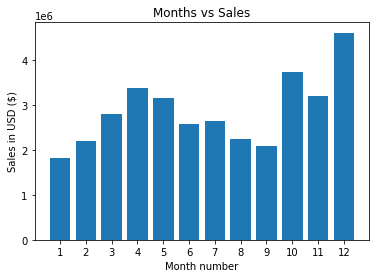

In [215]:
import matplotlib.pyplot as plt

months = range(1,13) # 13 is exclusive thus we have 1 to 12. 
plt.bar(months, results_1['Sales'])


plt.xticks(months)

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt. title ('Months vs Sales')
plt.show()

Question 2: What city has the highest number of sales?

In [186]:
results_2= all_data.groupby('City').sum()
results_2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta( GA),16602,2.779908e+06,104794,2.795499e+06
Austin( TX),11153,1.809874e+06,69829,1.819582e+06
Boston( MA),22528,3.637410e+06,141112,3.661642e+06
Dallas( TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles( CA),33289,5.421435e+06,208325,5.452571e+06
New York City( NY),27932,4.635371e+06,175741,4.664317e+06
Portland( ME),2750,4.471893e+05,17144,4.497583e+05
Portland( OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco( CA),50239,8.211462e+06,315520,8.262204e+06


San Francisco looks best, and Portlabd Maine is worse. 

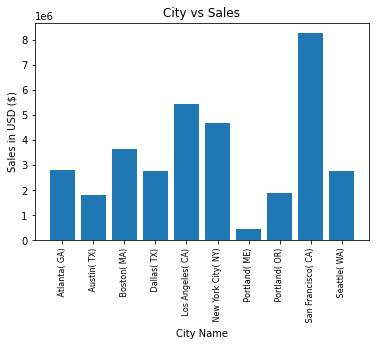

In [216]:
import matplotlib.pyplot as plt

# cities= all_data['City'].unique()

# y data and x data isnt in same order 
# so we need them in same order, thus we change our command above a little bit

cities= [city for city, df in all_data.groupby('City')]

plt.bar(cities, results_2['Sales'])


plt.xticks(cities, rotation= 'vertical', size= 8)

plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt. title ('City vs Sales')
plt.show()

Now we can see San Francisco is doing way better than any other cities, like we saw in the table.  Also, Portland Maine is worse. 

#### Question 3: What time should we display advertisments to maximize likelihood of customer's buying product?

For this question we need to look at order date and see the time. 

Thus we are first going to convert order date column to date/time object using date time library, and than distribute over 24 hrs period 

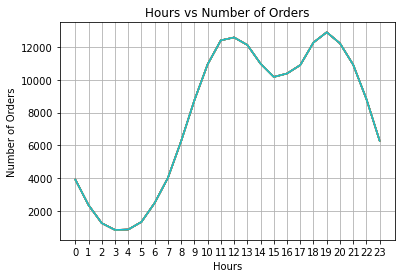

In [231]:
hours= [hour for hour, df in all_data.groupby('Hour')]

all_data.groupby(['Hour']).count()
# table shows number of orders by hours. 


plt.plot(hours, all_data.groupby(['Hour']).count())
plt. xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Hours vs Number of Orders')
plt.grid()

plt.show()

We have peaks around 11am and another peak around 7pm (19). Little before and around that time is good time to advertise. 

#### Question 4: What products are most often sold together?

I think probably the time that have same order numbers are sold together and than we need to see how often does it happens 

In [239]:
df = all_data[all_data['Order ID']. duplicated(keep= False)]

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))

df= df[['Order ID','Grouped']].drop_duplicates()
df.head()

<ipython-input-239-d750238ea6a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [248]:
# Now we want to count the pairs that occurs frequently. 


from itertools import combinations 
from collections import Counter

count= Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
# Changing 2 to 3 gives list of 3 items group bought together. 
    
#print(count)

# shows iphone and lighting charging cable occurs the most with print command.

for key, value in count.most_common(10): 
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product was sold the most? Why do you think it was sold the most? 

In [249]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City( NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City( NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City( NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco( CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta( GA),12,38


In [254]:
product_group = all_data.groupby('Product')
print(product_group)

product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


The quantity ordered will tell us that but we are going to look at graph. 

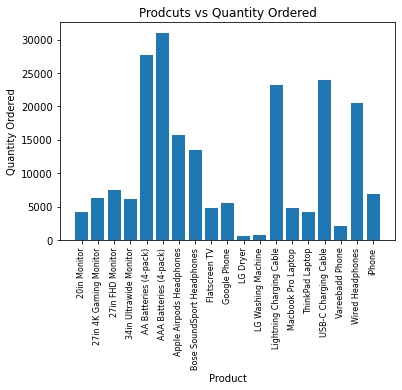

In [267]:
quantity_ordered= product_group.sum()['Quantity Ordered']
products= [product for product, df in product_group]

plt.bar(products, quantity_ordered)


plt.xticks(products, rotation= 'vertical', size= 8)

plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt. title ('Prodcuts vs Quantity Ordered')
plt.show()

The product sold more were AAA batteries and lighting cables and stuff, they are sold most because they are cheap comparision to others 

But we need to prove our assumptions, so we will overlay this graph with prices of the products. 

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-281-1c0ad242ce7d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= 'vertical', size= 8)


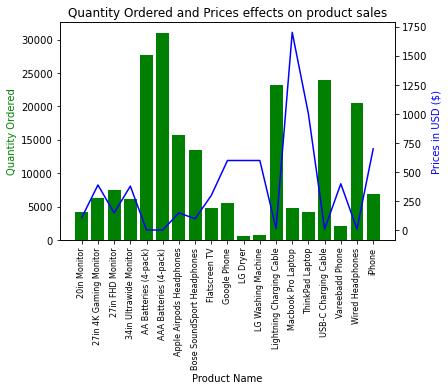

In [281]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)


fig, ax1 = plt.subplots()
ax2= ax1.twinx()
ax1.bar(products,quantity_ordered, color= 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices in USD ($)', color= 'b')
ax1.set_xticklabels(products, rotation= 'vertical', size= 8)
ax1.set_title('Quantity Ordered and Prices effects on product sales')
plt.show()

In [ ]:
thus this gives good idea of prices vs quantity ordered. 